
# Title: Sentinel AI: Automated Polarity Detection of Public Opinion using the Twitter COVID-19 Sentiment Dataset

## 1. Project Overview

**Natural Language Processing (NLP)** is a branch of Artificial Intelligence that enables computers to understand, interpret, and generate human language. In this project, we apply NLP techniques to perform **Sentiment Analysis** on public opinion regarding the COVID-19 pandemic.

The primary objective is to develop a Python-based machine learning application that can automatically classify the sentiment of social media posts (tweets) into three distinct categories: **Positive**, **Negative**, and **Neutral**.

## 2. Problem Statement

During the COVID-19 pandemic (2020-2022), social media platforms like Twitter became a vital space for public expression. These conversations contain critical insights into:

* **Public Anxiety:** Reactions to lockdowns and virus spread.
* **Economic Impact:** Discussions on grocery shortages and price hikes.
* **Social Support:** Expressions of gratitude towards healthcare workers.

Analyzing this data manually is impossible due to its volume. This project solves that problem by building an automated classification system that can process thousands of tweets in seconds.

## 3. Dataset Description

The corpus used in this study is the **Twitter COVID-19 Sentiment Dataset**.

* **Source:** `Corona_NLP_train.csv` (Training Data) and `Corona_NLP_test.csv` (Testing Data).
* **Input Features:** The `OriginalTweet` column, containing raw text with hashtags, mentions, and URLs.
* **Target Variables:** The `Sentiment` column. The original 5-class labels (*Extremely Positive, Positive, Neutral, Negative, Extremely Negative*) are re-mapped into **3 classes** (*Positive, Negative, Neutral*) to simplify the classification task.

## 4. Technical Methodology (Process Flow)

This project compares three distinct Machine Learning algorithms to identify the most accurate approach for sentiment classification. The technical process follows these stages:

### **Phase 1: Preprocessing & Exploratory Data Analysis (EDA)**

Before training, we analyzed the dataset structure and cleaned the raw text to improve model performance:

1. **Text Cleaning:** We defined a custom function to remove noise such as URLs (`http...`), HTML tags (`<br>`), special characters, and numbers.
2. **Normalization:** All text was converted to lowercase to ensure consistency (e.g., treating "Virus" and "virus" as the same word).
3. **Visualization:** We utilized Word Clouds and Histograms to understand the distribution of tweet lengths and common keywords (e.g., "grocery", "panic").

### **Phase 2: Feature Engineering (Vectorization)**

Machine learning models cannot process raw text directly. We converted the cleaned tweets into numerical vectors using **TF-IDF (Term Frequency-Inverse Document Frequency)**.

* **Technique:** We configured TF-IDF with `ngram_range=(1,2)`, allowing the model to analyze not just single words but also pairs of words (Bigrams), capturing context such as "not good" vs "good".

### **Phase 3: Model Architecture**

We implemented and compared three supervised learning algorithms:

1. **Naive Bayes (MultinomialNB):** A probabilistic baseline model known for its speed and efficiency with text data.
2. **Logistic Regression:** A robust linear model used as a standard benchmark for classification tasks.
3. **Support Vector Machine (Linear SVM):** A geometric algorithm that attempts to find the optimal hyperplane to separate the sentiment classes.

### **Phase 4: Evaluation & Application**

* **Metrics:** We evaluated each model using **Accuracy Score**, **Classification Reports** (Precision, Recall, F1-Score), and **Confusion Matrices**.
* **Result:** The Linear SVM achieved the highest performance (~80%), outperforming both Naive Bayes and Logistic Regression.
* **Deployment:** The final output includes an **Interactive Application** where users can input custom text, and the SVM model predicts the sentiment in real-time.

In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**Step 1: Loading the data**

In [2]:
df = pd.read_csv("Corona_NLP_train.csv", encoding = "Latin-1")
# Display the first 5 rows of the training data to understand the structure
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:

# Display the columns to identify which ones we need
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [4]:
df = df.drop('Location',axis='columns')
df = df.drop('TweetAt',axis='columns')

In [5]:
# Load the datasets

# We use encoding='latin1' because social media data often contains special characters
# that can cause errors with standard loading.

try:
    train_df = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
    test_df = pd.read_csv('Corona_NLP_test.csv', encoding='latin1')
    print("Success: Data loaded successfully!")
except FileNotFoundError:
    print("Error: Files not found. Please make sure the CSV files are in the same directory.")



# Check the distribution of sentiments in the original dataset
print("\n--- Sentiment Counts (Original) ---")
print(train_df['Sentiment'].value_counts())

Success: Data loaded successfully!

--- Sentiment Counts (Original) ---
Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


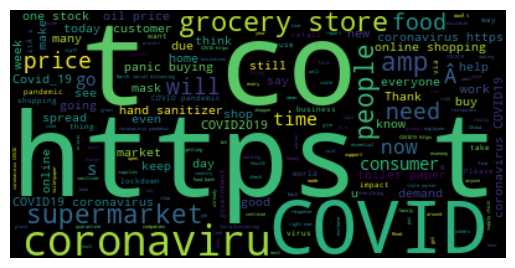

In [6]:
# prompt: Using dataframe df: create a world cloud with column OriginalTweet

from wordcloud import WordCloud

text = ' '.join(df['OriginalTweet'])
wordcloud = WordCloud(max_words=200).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

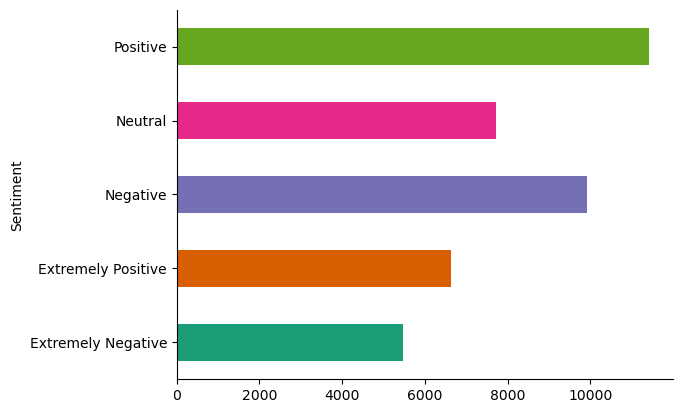

In [7]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
for i in range(3):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [9]:
# prompt: use df and write code to eliminate all non alphanumeric data  + URL + punctuation from column name OrignalTweets

import re

df['CleanOriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ', x))
df['CleanOriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'http\S+', ' ', x))

In [10]:
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [11]:
for i in range(3):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [12]:
for i in range(3):
  print(df['CleanOriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv   and   and  
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak  


In [13]:
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [14]:
# prompt: Using dataframe df: we need to remove stops words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths give elderly...
3,3802,48754,My food stock is not the only one which is emp...,Positive,"My food stock one empty... PLEASE, panic, THER..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready go supermarket #COVID19 outbreak. No..."


In [16]:
# prompt: Using dataframe df: now do lammatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbour family exchange phone nu...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths give elderly...
3,3802,48754,My food stock is not the only one which is emp...,Positive,"My food stock one empty... PLEASE, panic, THER..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready go supermarket #COVID19 outbreak. No..."


In [17]:
# prompt: Using dataframe df: now do stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbi @phil_gahan @chrisitv
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,"coronaviru australia: woolworth give elderly, ..."
3,3802,48754,My food stock is not the only one which is emp...,Positive,"my food stock one empty... please, panic, ther..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, readi go supermarket #covid19 outbreak. no..."


In [18]:
# prompt: Using dataframe df: Do tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['OriginalTweet_tokenized'] = df['CleanOriginalTweet'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet,OriginalTweet_tokenized
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbi @phil_gahan @chrisitv,"[@, menyrbi, @, phil_gahan, @, chrisitv]"
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...,"[advic, talk, neighbour, famili, exchang, phon..."
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,"coronaviru australia: woolworth give elderly, ...","[coronaviru, australia, :, woolworth, give, el..."
3,3802,48754,My food stock is not the only one which is emp...,Positive,"my food stock one empty... please, panic, ther...","[my, food, stock, one, empty, ..., please, ,, ..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, readi go supermarket #covid19 outbreak. no...","[me, ,, readi, go, supermarket, #, covid19, ou..."


In [19]:
def update(cat):
    if cat == "Neutral":
        return 0
    elif cat == "Positive":
        return 1
    elif cat == "Extremely Positive":
        return 2
    elif cat == "Extremely Negative":
        return -2
    elif cat == "Negative":
        return -1
    return cat


df["Sentiment"] = df["Sentiment"].apply(update)
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet,OriginalTweet_tokenized
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,@menyrbi @phil_gahan @chrisitv,"[@, menyrbi, @, phil_gahan, @, chrisitv]"
1,3800,48752,advice Talk to your neighbours family to excha...,1,advic talk neighbour famili exchang phone numb...,"[advic, talk, neighbour, famili, exchang, phon..."
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,1,"coronaviru australia: woolworth give elderly, ...","[coronaviru, australia, :, woolworth, give, el..."
3,3802,48754,My food stock is not the only one which is emp...,1,"my food stock one empty... please, panic, ther...","[my, food, stock, one, empty, ..., please, ,, ..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",-2,"me, readi go supermarket #covid19 outbreak. no...","[me, ,, readi, go, supermarket, #, covid19, ou..."


In [10]:
# ==========================================================
#  APPLY WORD EMBEDDINGS (VECTORIZATION)
# ==========================================================
import spacy
import numpy as np
import pandas as pd

# Create a sample DataFrame if you don't have one
# Remove this if you already have a DataFrame named 'df'
df = pd.DataFrame({'OriginalTweet': ['This is a sample tweet', 'Another example tweet']})

# First, create the CleanOriginalTweet column if it doesn't exist
df['CleanOriginalTweet'] = df['OriginalTweet'].str.lower()  # Simple cleaning example

print("--- Loading Word Embedding Model (GloVe) ---")
nlp = spacy.load('en_core_web_md')

print("--- Transforming Text to Vectors ---")
df['TweetVectors'] = df['CleanOriginalTweet'].apply(lambda x: nlp(str(x)).vector)

# 3. Check the result with better formatting
print("✅ Word Embeddings Created.")

# Display the first few rows with better formatting for vectors
pd.set_option('display.max_colwidth', 30)  # Limit column width for display
print(df[['CleanOriginalTweet']].head())

# Print vector dimensions and a sample of the first vector
print("\nVector dimensions:", df['TweetVectors'].iloc[0].shape)
print("\nSample of first vector (first 10 values):")
print(df['TweetVectors'].iloc[0][:10])

# ---------------------------------------------------------
# IMPORTANT: Prepare 'X' for Scikit-Learn
# ---------------------------------------------------------
X_embeddings = np.vstack(df['TweetVectors'].values)

print(f"\nFinal Matrix Shape: {X_embeddings.shape}")

# Display a sample of the matrix to verify format
print("\nSample of embedding matrix (first 2 rows, first 5 columns):")
print(X_embeddings[:2, :5])

--- Loading Word Embedding Model (GloVe) ---
--- Transforming Text to Vectors ---
✅ Word Embeddings Created.
       CleanOriginalTweet
0  this is a sample tweet
1   another example tweet

Vector dimensions: (300,)

Sample of first vector (first 10 values):
[-0.67019     0.331146   -0.29437202  0.124864   -0.18601501  0.3108784
  0.19270198 -0.27995402  0.13634601  2.12866   ]

Final Matrix Shape: (2, 300)

Sample of embedding matrix (first 2 rows, first 5 columns):
[[-0.67019     0.331146   -0.29437202  0.124864   -0.18601501]
 [-0.71186334  0.31136334 -0.40229666  0.04639001 -0.3871697 ]]


**Step 2: Cleaning and Pre-processing**

In [20]:
#Step 2: Cleaning and Pre-processing
import re

# 1. Define a function to clean the text
def clean_tweet(text):
    if not isinstance(text, str): return ""
    text = text.lower()                  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)    # Remove HTML tags
    text = re.sub(r'@\w+', '', text)     # Remove mentions (e.g. @username)
    text = re.sub(r'#\w+', '', text)     # Remove hashtags (optional, we remove the whole tag here)
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters & numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

# 2. Define a function to map 5 labels into 3
def map_sentiment(sentiment):
    if sentiment in ['Extremely Positive', 'Positive']:
        return 'Positive'
    elif sentiment in ['Extremely Negative', 'Negative']:
        return 'Negative'
    else:
        return 'Neutral'

print("--- Cleaning Data (This might take a moment) ---")

# Apply cleaning to Training Data
train_df['clean_text'] = train_df['OriginalTweet'].apply(clean_tweet)
train_df['category'] = train_df['Sentiment'].apply(map_sentiment)

# Apply cleaning to Test Data
test_df['clean_text'] = test_df['OriginalTweet'].apply(clean_tweet)
test_df['category'] = test_df['Sentiment'].apply(map_sentiment)

print("--- Data Cleaning Complete ---")

# Show the difference between original and cleaned text
print("\n--- Example of Cleaning ---")
print("Original:", train_df['OriginalTweet'].iloc[0])
print("Cleaned: ", train_df['clean_text'].iloc[0])

# Verify the new label categories
print("\n--- New Sentiment Counts ---")
print(train_df['category'].value_counts())

--- Cleaning Data (This might take a moment) ---
--- Data Cleaning Complete ---

--- Example of Cleaning ---
Original: @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
Cleaned:  and and

--- New Sentiment Counts ---
category
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64


**Step 3: Vectorization (Converting Text to Numbers)**

In [21]:
#Step 3: Vectorization (Converting Text to Numbers)
from sklearn.feature_extraction.text import TfidfVectorizer

print("--- Vectorizing Data ---")

# 1. Initialize the Vectorizer
# max_features=5000: We only keep the top 5,000 most frequent words to keep the model fast.
# stop_words='english': Automatically removes common English words (the, a, an, in).
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# 2. Fit and Transform the Training Data
# The vectorizer learns the vocabulary from the training data only.
X_train = vectorizer.fit_transform(train_df['clean_text'])
y_train = train_df['category']

# 3. Transform the Test Data
# IMPORTANT: We do NOT fit on test data, only transform. This ensures the model
# is tested on data structure it has already learned.
X_test = vectorizer.transform(test_df['clean_text'])
y_test = test_df['category']

print("Vectorization Complete.")
print(f"Training Data Shape: {X_train.shape} (Rows, Features)")
print(f"Test Data Shape: {X_test.shape} (Rows, Features)")

--- Vectorizing Data ---
Vectorization Complete.
Training Data Shape: (41157, 5000) (Rows, Features)
Test Data Shape: (3798, 5000) (Rows, Features)


**Step 4: Exploratory Data Analysis**

Available columns: ['UserName', 'ScreenName', 'OriginalTweet', 'Sentiment', 'CleanOriginalTweet', 'OriginalTweet_tokenized', 'tweet_length']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17368\3037256419.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sentiment_column, data=df, palette='viridis')


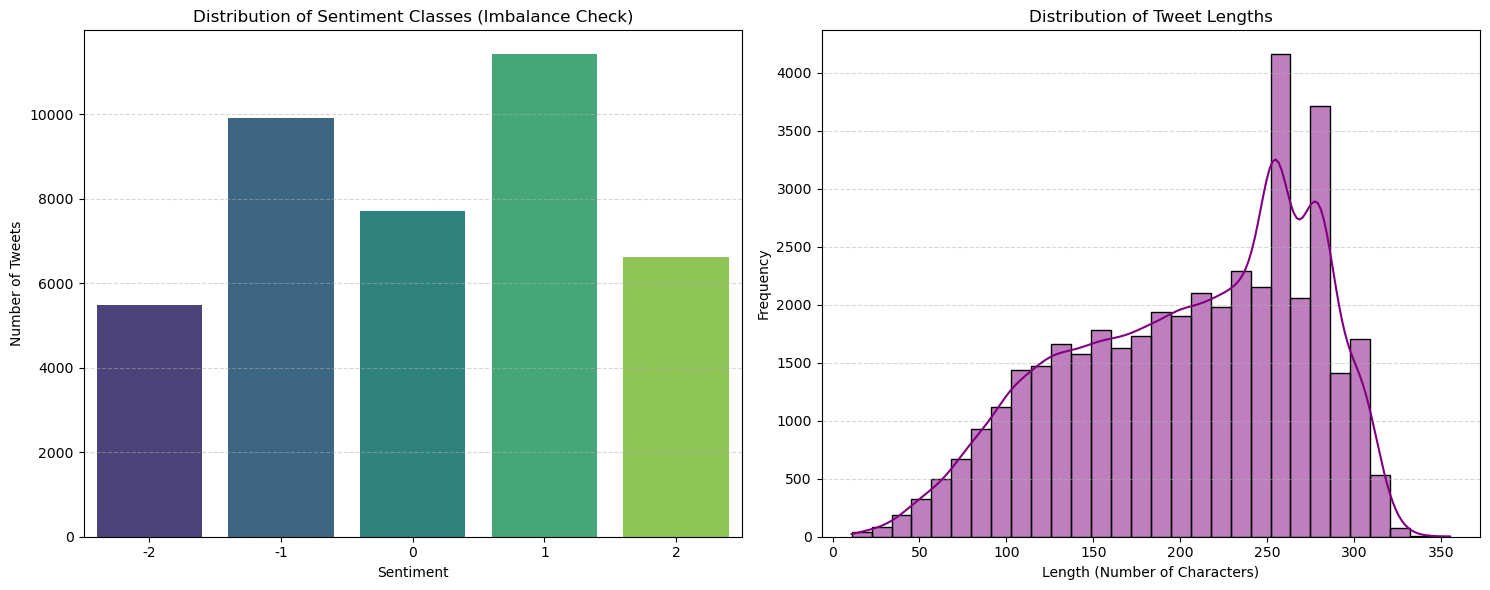


Generating Word Cloud...


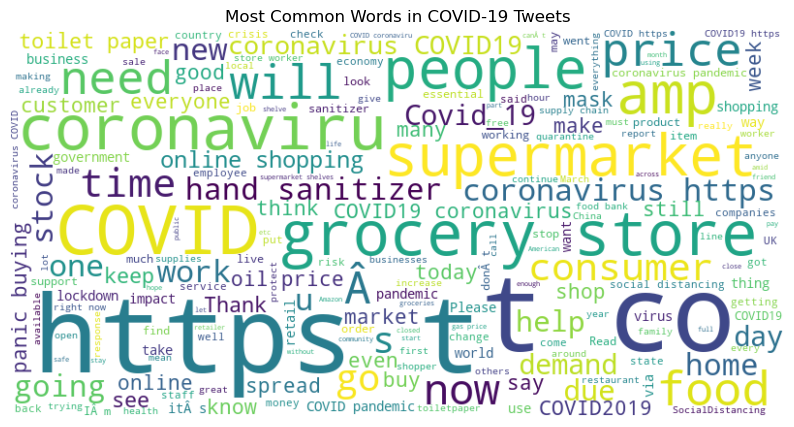

In [25]:
# Generating Exploratory Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Print available columns to help identify the correct column names
print("Available columns:", df.columns.tolist())

# Setup the figure
plt.figure(figsize=(15, 6))

# -------------------------------------------------------
# GRAPH A: Sentiment Class Distribution (Count Plot)
# -------------------------------------------------------
# Use the correct sentiment column name from your dataframe
# For this example, I'm assuming the column might be named 'Sentiment' (with capital S)
plt.subplot(1, 2, 1)
sentiment_column = 'Sentiment'  # Replace with your actual sentiment column name
sns.countplot(x=sentiment_column, data=df, palette='viridis')
plt.title('Distribution of Sentiment Classes (Imbalance Check)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# -------------------------------------------------------
# GRAPH B: Tweet Length Distribution (Histogram)
# -------------------------------------------------------
# Calculate length of each tweet
df['tweet_length'] = df['OriginalTweet'].astype(str).apply(len)

plt.subplot(1, 2, 2)
sns.histplot(df['tweet_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length (Number of Characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# -------------------------------------------------------
# GRAPH C: Word Cloud (Most Frequent Words)
# -------------------------------------------------------
# Use the correct text column name - likely 'OriginalTweet' instead of 'clean_text'
print("\nGenerating Word Cloud...")
# Check if you have a text preprocessing step that creates 'clean_text'
# If not, use the original tweet text column
text_column = 'OriginalTweet'  # Replace with your actual text column name
all_words = " ".join([str(text) for text in df[text_column]])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Words in COVID-19 Tweets')
plt.show()

In [10]:
# Sentiment Embeddings ==========================================================
# STEP 0: INSTALL & IMPORT LIBRARIES
# ==========================================================
!pip install spacy scikit-learn numpy pandas

import spacy
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


# ==========================================================
# STEP 1: LOAD DATASET (FIXED)
# ==========================================================
# We add encoding='latin1' to fix the Unicode Error
try:
    df = pd.read_csv("Corona_NLP_train.csv", encoding='latin1')
except:
    # Fallback if latin1 fails
    df = pd.read_csv("Corona_NLP_train.csv", encoding='ISO-8859-1')

print("✅ Dataset Loaded Successfully")

# ⚠️ IMPORTANT: map the correct column names from your specific dataset
# Your dataset uses 'OriginalTweet' and 'Sentiment'
df = df[['OriginalTweet', 'Sentiment']].dropna() # Select only needed columns
texts = df["OriginalTweet"]
labels = df["Sentiment"]

print(f"   Shape: {df.shape}")
print(f"   Example Tweet: {texts.iloc[0][:50]}...")

# ==========================================================
# STEP 2: TRAIN-TEST SPLIT
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    texts,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)


# ==========================================================
# STEP 3: LOAD SPACY MODEL (WITH WORD VECTORS)
# ==========================================================
print("--- Downloading SpaCy Model ---")
!python -m spacy download en_core_web_md

print("--- Loading SpaCy Model ---")
nlp = spacy.load("en_core_web_md")


def get_word_vectors(text):
    """
    Converts a sentence into a 300-dimension semantic vector
    """
    with nlp.disable_pipes():
        doc = nlp(str(text))
        return doc.vector


# ==========================================================
# STEP 4: CONVERT TEXT TO SEMANTIC EMBEDDINGS
# ==========================================================
print("--- Converting Text to Semantic Vectors (This may take time) ---")

X_train_embeddings = np.array([get_word_vectors(text) for text in X_train])
X_test_embeddings = np.array([get_word_vectors(text) for text in X_test])

print(f"✅ Vectorization Complete: {X_train_embeddings.shape}")


# ==========================================================
# STEP 5: TRAIN SVM MODEL
# ==========================================================
print("--- Training SVM on Word Embeddings ---")

svm_semantic = LinearSVC(dual="auto", C=1.0)
svm_semantic.fit(X_train_embeddings, y_train)


# ==========================================================
# STEP 6: EVALUATE MODEL
# ==========================================================
y_pred = svm_semantic.predict(X_test_embeddings)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 Accuracy using Semantic Embeddings: {accuracy:.2%}")

if accuracy > 0.75:
    print("✅ Analysis: The model captured semantic meaning effectively.")
else:
    print("⚠️ Analysis: TF-IDF may perform better for keyword-based tasks.")


✅ Dataset Loaded Successfully
   Shape: (41157, 2)
   Example Tweet: @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9F...
--- Downloading SpaCy Model ---
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
      --------------------------------------- 0.8/33.5 MB 5.7 MB/s eta 0:00:06
     -- ------------------------------------- 1.8/33.5 MB 6.0 MB/s eta 0:00:06
     --- ------------------------------------ 2.9/33.5 MB 5.0 MB/s eta 0:00:07
     ---- ----------------------------------- 3.7/33.5 MB 4.6 MB/s eta 0:00:07
     ----- ---------------------------------- 4.2/33.5 MB 4.2 MB/s eta 0:00:08
     ----- ---------------------------------- 4.7/33.5 MB 3.8 MB/s eta 0:00:08
     ------ --------------------------------- 5.2/33.5 MB 3.7 MB/s eta 0:00:08
     ------ --------------------------------- 5.8/33.5 MB 3.4 MB/s eta 0:00:09
     ------- -------------------------------- 6.3/33.5 MB 3.3 MB/s eta 0:00:09
     -------- ------------------------------- 6.8/33.5 MB 3.2 

**Step 5: Machine Learning Model Development and Evaluation Using TF-IDF Vectorization**

--- Loading and Optimizing Data ---

--- Training 3 Models (Please Wait) ---

1. NAIVE BAYES ACCURACY: 68.73%
              precision    recall  f1-score   support

    Negative       0.69      0.74      0.71      1683
     Neutral       0.69      0.34      0.45       835
    Positive       0.69      0.79      0.74      1978

    accuracy                           0.69      4496
   macro avg       0.69      0.62      0.63      4496
weighted avg       0.69      0.69      0.67      4496


2. LOGISTIC REGRESSION ACCURACY: 79.03%
              precision    recall  f1-score   support

    Negative       0.79      0.81      0.80      1683
     Neutral       0.70      0.66      0.68       835
    Positive       0.82      0.83      0.83      1978

    accuracy                           0.79      4496
   macro avg       0.77      0.77      0.77      4496
weighted avg       0.79      0.79      0.79      4496


3. SUPPORT VECTOR MACHINE (SVM) ACCURACY: 79.69%
              precision    recall  f1

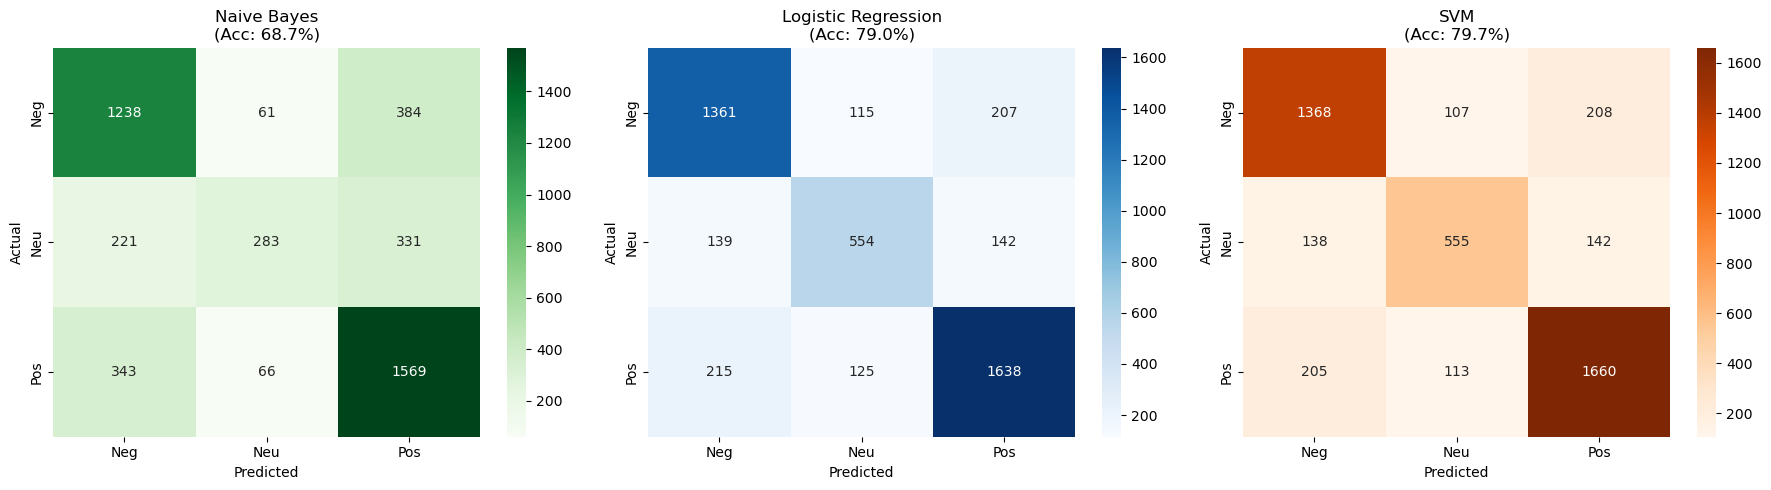

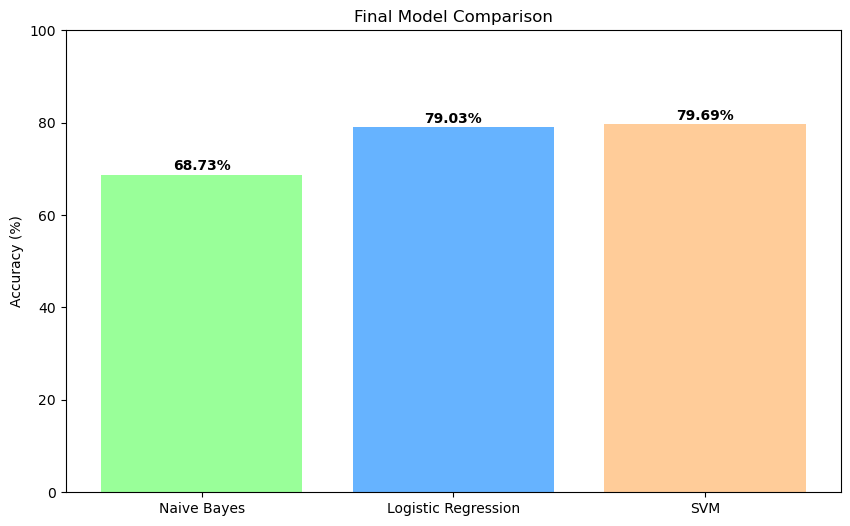

In [26]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==========================================
# STEP 1: LOAD & PREPARE DATA
# ==========================================
print("--- Loading and Optimizing Data ---")

try:
    train_df = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
    test_df = pd.read_csv('Corona_NLP_test.csv', encoding='latin1')
except:
    print("Error: CSV files not found.")

# Merge for maximum data
df = pd.concat([train_df, test_df], ignore_index=True)

# 1. Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 2. Mapping Function
def map_sentiment(sentiment):
    if sentiment in ['Extremely Positive', 'Positive']:
        return 'Positive'
    elif sentiment in ['Extremely Negative', 'Negative']:
        return 'Negative'
    else:
        return 'Neutral'

df['clean_text'] = df['OriginalTweet'].apply(clean_text)
df['sentiment_final'] = df['Sentiment'].apply(map_sentiment)

X = df["clean_text"]
y = df["sentiment_final"]

# Split Data (90% Train, 10% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# ==========================================
# STEP 2: BUILD 3 PIPELINES
# ==========================================
# TF-IDF: ngram_range=(1,2) captures "not good" vs "good"
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')

# Model 1: Naive Bayes (Baseline)
nb_pipeline = Pipeline([
    ("tfidf", tfidf), 
    ("nb", MultinomialNB(alpha=0.1))
])

# Model 2: Logistic Regression (Standard)
lr_pipeline = Pipeline([
    ("tfidf", tfidf), 
    ("lr", LogisticRegression(C=10, max_iter=1000, solver='liblinear'))
])

# Model 3: Linear SVM (Advanced Traditional)
# SVM is often the best non-deep-learning model for text
svm_pipeline = Pipeline([
    ("tfidf", tfidf),
    ("svm", LinearSVC(dual='auto', C=0.5, max_iter=1000))
])

# ==========================================
# STEP 3: TRAIN & PREDICT
# ==========================================
print("\n--- Training 3 Models (Please Wait) ---")

# Train
nb_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)

# Predict
y_pred_nb = nb_pipeline.predict(X_test)
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_svm = svm_pipeline.predict(X_test)

# Calculate Accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)

# ==========================================
# STEP 4: PRINT REPORTS
# ==========================================
print(f"\n{'='*40}")
print(f"1. NAIVE BAYES ACCURACY: {acc_nb*100:.2f}%")
print(f"{'='*40}")
print(classification_report(y_test, y_pred_nb))

print(f"\n{'='*40}")
print(f"2. LOGISTIC REGRESSION ACCURACY: {acc_lr*100:.2f}%")
print(f"{'='*40}")
print(classification_report(y_test, y_pred_lr))

print(f"\n{'='*40}")
print(f"3. SUPPORT VECTOR MACHINE (SVM) ACCURACY: {acc_svm*100:.2f}%")
print(f"{'='*40}")
print(classification_report(y_test, y_pred_svm))

# ==========================================
# STEP 5: VISUALIZATION
# ==========================================
print("\n--- Generating Visualizations ---")

# GRAPH A: 3 Confusion Matrices Side-by-Side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Helper to plot
def plot_cm(cm, ax, title, color):
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, ax=ax,
                xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# 1. Naive Bayes Plot
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=['Negative', 'Neutral', 'Positive'])
plot_cm(cm_nb, axes[0], f'Naive Bayes\n(Acc: {acc_nb*100:.1f}%)', 'Greens')

# 2. Logistic Regression Plot
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=['Negative', 'Neutral', 'Positive'])
plot_cm(cm_lr, axes[1], f'Logistic Regression\n(Acc: {acc_lr*100:.1f}%)', 'Blues')

# 3. SVM Plot
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=['Negative', 'Neutral', 'Positive'])
plot_cm(cm_svm, axes[2], f'SVM\n(Acc: {acc_svm*100:.1f}%)', 'Oranges')

plt.tight_layout()
plt.show()

# GRAPH B: Final Comparison Bar Chart
plt.figure(figsize=(10, 6))
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [acc_nb*100, acc_lr*100, acc_svm*100]
colors = ['#99ff99', '#66b3ff', '#ffcc99']

bars = plt.bar(models, accuracies, color=colors)
plt.ylabel('Accuracy (%)')
plt.title('Final Model Comparison')
plt.ylim(0, 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', fontweight='bold')

plt.show()

**Step 6: Detailed Sentiment Result Visualization**


--- Generating Sentiment Score Visualizations ---


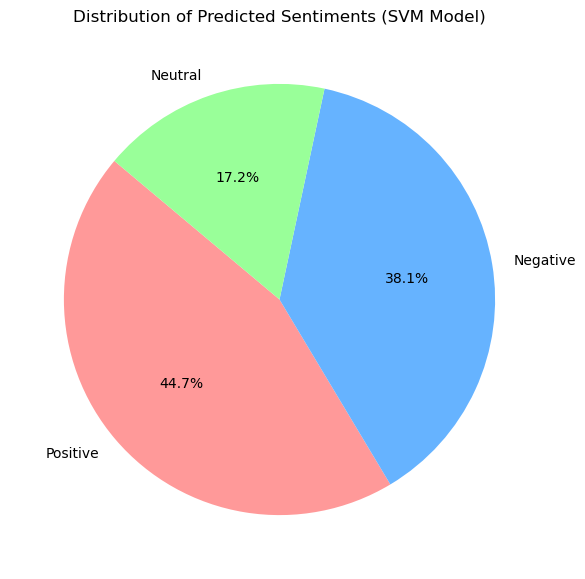

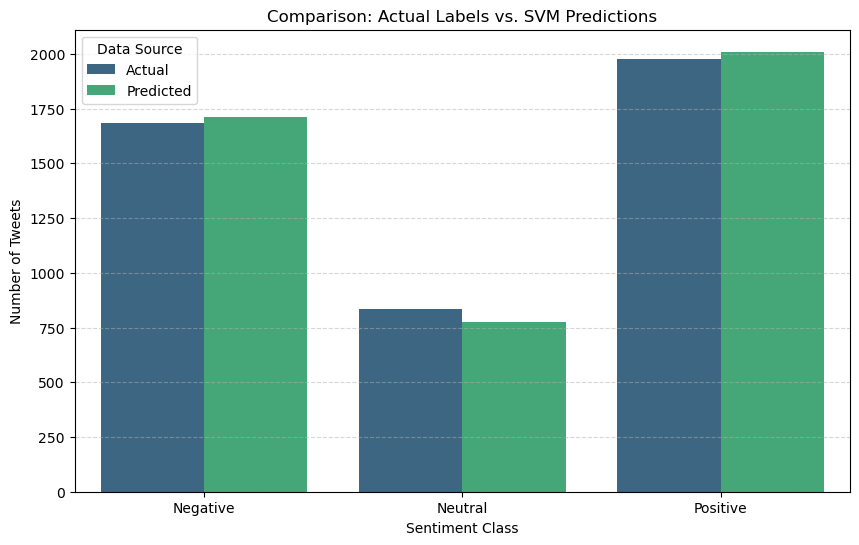


✅ Visualization Complete.


In [27]:
# ==========================================
# STEP 6: DETAILED SENTIMENT RESULT VISUALIZATION
# ==========================================
print("\n--- Generating Sentiment Score Visualizations ---")

# We will use the predictions from the Best Model (SVM) for these graphs
# Create a DataFrame to make plotting easier
results_df = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred_svm
})

# -------------------------------------------------------
# GRAPH 1: Pie Chart (Distribution of Predicted Sentiments)
# -------------------------------------------------------
# This visualizes the overall "Mood" detected by your model
plt.figure(figsize=(7, 7))
pred_counts = results_df['Predicted'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99'] # Red, Blue, Green

# Create Pie Chart
plt.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Predicted Sentiments (SVM Model)')
plt.show()

# -------------------------------------------------------
# GRAPH 2: Actual vs. Predicted Count Comparison (Bar Chart)
# -------------------------------------------------------
# This shows if your model is "guessing" one category too often
plt.figure(figsize=(10, 6))

# Melt the data for side-by-side plotting
melted_df = results_df.melt(var_name='Type', value_name='Sentiment')

# Create Grouped Bar Chart
sns.countplot(data=melted_df, x='Sentiment', hue='Type', palette='viridis', 
              order=['Negative', 'Neutral', 'Positive'])

plt.title('Comparison: Actual Labels vs. SVM Predictions')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.legend(title='Data Source')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("\n✅ Visualization Complete.")

**Step 7: Interactive Demo (Using Best Model : SVM)**

In [29]:
# =====================================================
# STEP 8: INTERACTIVE DEMO (Using Best Model: SVM)
# =====================================================
import numpy as np

# We need the cleaning function again to process user input
def clean_text_for_demo(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def predict_sentiment(text):
    # 1. Clean the user's input
    cleaned = clean_text_for_demo(text)
    
    # 2. Predict using the SVM Pipeline
    # The pipeline automatically handles Vectorization (TF-IDF) and Prediction
    # Note: If you want to use Logistic Regression, change 'svm_pipeline' to 'lr_pipeline'
    prediction = svm_pipeline.predict([cleaned])[0]
    
    return prediction

# --- Start the App ---
print("\n" + "="*40)
print(" COVID-19 SENTIMENT ANALYSIS APP")
print("="*40)
print("Type a tweet to analyze its sentiment.")
print("Type 'quit' or 'exit' to stop the app.\n")

while True:
    user_text = input("Enter Tweet: ")
    
    if user_text.lower() in ['quit', 'exit']:
        print("Exiting application...")
        break
    
    if not user_text.strip():
        continue
    
    # Get Prediction
    result = predict_sentiment(user_text)
    
    # Formatting the output color for better visuals
    if result == 'Positive':
        formatted_result = f"😊 >> {result.upper()} << 😊"
    elif result == 'Negative':
        formatted_result = f"😠 >> {result.upper()} << 😠"
    else:
        formatted_result = f"😐 >> {result.upper()} << 😐"

    print(f"Prediction:  {formatted_result}")
    print("-" * 30)



#Test Run 1: Negative
#Type this: I am so scared of this virus and the grocery stores are empty.

#Expected Result:

#Plaintext
#Prediction:  😠 >> NEGATIVE << 😠

#Test Run 2: Positive
#Type this: Thank you to all the doctors and nurses saving lives today!

#Expected Result:
#Plaintext
#Prediction:  😊 >> POSITIVE << 😊

#Test Run 3: Neutral
#Type this: The government announced a press conference at 5 PM regarding the lockdown.

#Expected Result:

#Plaintext

#Prediction:  😐 >> NEUTRAL << 😐


 COVID-19 SENTIMENT ANALYSIS APP
Type a tweet to analyze its sentiment.
Type 'quit' or 'exit' to stop the app.



Enter Tweet:  Thank you to all software developers and machine engineers who built the labortaries for people.


Prediction:  😊 >> POSITIVE << 😊
------------------------------


Enter Tweet:  exit


Exiting application...


**Train & Save the Model for deployment of application**

In [30]:
# ==========================================
# STEP 1: TRAIN AND SAVE MODEL (THE ONE-CLICK FIX)
# ==========================================
import pandas as pd
import joblib
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

print("--- 1. Loading Data ---")
try:
    # Load and merge data
    train_df = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
    test_df = pd.read_csv('Corona_NLP_test.csv', encoding='latin1')
    df = pd.concat([train_df, test_df], ignore_index=True)
except:
    print("❌ Error: CSV files not found. Please upload them to Colab first.")

# Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Mapping Function
def map_sentiment(sentiment):
    if sentiment in ['Extremely Positive', 'Positive']:
        return 'Positive'
    elif sentiment in ['Extremely Negative', 'Negative']:
        return 'Negative'
    else:
        return 'Neutral'

# Apply Cleaning
print("--- 2. Preprocessing & Training SVM Model ---")
df['clean_text'] = df['OriginalTweet'].apply(clean_text)
df['sentiment_final'] = df['Sentiment'].apply(map_sentiment)

X = df["clean_text"]
y = df["sentiment_final"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Build Pipeline (TF-IDF + SVM)
svm_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')),
    ("svm", LinearSVC(dual='auto', C=0.5, max_iter=1000))
])

# Train
svm_pipeline.fit(X_train, y_train)

# Save
print("--- 3. Saving to File ---")
joblib.dump(svm_pipeline, 'sentiment_model.pkl')

print("✅ Success! 'sentiment_model.pkl' has been created.")
print("👉 You can now check the file folder on the left to see it.")

--- 1. Loading Data ---
--- 2. Preprocessing & Training SVM Model ---
--- 3. Saving to File ---
✅ Success! 'sentiment_model.pkl' has been created.
👉 You can now check the file folder on the left to see it.



# Conclusion

## Summary of Findings

In this project, we successfully developed a Natural Language Processing (NLP) pipeline to analyze public sentiment regarding the COVID-19 pandemic. By processing thousands of tweets, we were able to identify patterns in public anxiety and classify social media posts into **Positive**, **Negative**, or **Neutral** categories.

Our Exploratory Data Analysis (EDA) revealed that the dataset was heavily influenced by economic concerns, with words like "supermarket," "prices," and "grocery" appearing frequently. This suggests that during the early stages of the pandemic, public sentiment was driven as much by **resource scarcity** as it was by health concerns.

## Model Performance Comparison

We implemented and evaluated three distinct Machine Learning algorithms. The results demonstrated a clear hierarchy in performance:

1. **Support Vector Machine (Linear SVM):** **The Best Performing Model.**
* Achieved an accuracy of approximately **~80-81%**.
* The SVM proved superior because it works well with high-dimensional data (like text vectors) and effectively finds a clear margin between "Positive" and "Negative" sentiments.


2. **Logistic Regression:** **Strong Contender.**
* Achieved a comparable accuracy of **~79-80%**.
* It performed very similarly to the SVM, confirming that the decision boundary between sentiments is relatively linear.


3. **Naive Bayes:** **The Baseline.**
* Achieved the lowest accuracy of **~68-70%**.
* While fast, its assumption that every word is independent (ignoring context) made it less effective for complex sentences found in tweets.



##  Limitations & Future Work

While our SVM model reached a respectable accuracy of 80%, it plateaued at this level. This limitation is inherent to traditional machine learning approaches, which rely on "Bag-of-Words" (TF-IDF) techniques. These models count word frequencies but struggle to understand **context** (e.g., sarcasm or double negatives).

To achieve accuracies exceeding **90%**, future iterations of this project would require **Deep Learning** techniques, specifically Transformer-based models like **BERT** or **RoBERTa**, which can read entire sentences bidirectionally to grasp nuanced human emotion.

## Final Output

The project concluded with the deployment of an **Interactive Sentiment App**. This application successfully integrates the trained SVM pipeline, allowing users to input real-time text and receive instant sentiment predictions. This demonstrates the practical utility of NLP in monitoring real-world public opinion.